# 🐬 [E-15] 프로젝트: 다양한 OCR 모델 비교하기

### `OCR(Optical Character Recognition, 광학 문자 인식)`
- 문자의 존재를 **Detection**하고, 어떤 문자인지 판독하는 **Recognitin**의 과정을 거친다.

<br/>

지금까지 `Google OCR API`, `keras-ocr`, `Tesseract` 이상 3가지의 OCR 기능을 활용했는데, 용도에 맞게 적절한 것을 선택하는 것도 중요할 것이다. <br/>
**위 3가지를 검증해보는 프로젝트를 진행해보자.**

In [4]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


### Step 1. 검증용 데이터셋 준비
OCR에서 다뤄본 것은 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것들이었다. 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect & recognize 하는지 검증하기 위한 이미지 데이터를 모아보자.
> 테스트용 이미지는 아무리 많아도 20장을 넘기지 않도록 하자.

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

import os
import glob
import matplotlib.image as img

In [6]:
image_path = os.getenv('HOME')+'/aiffel/ocr_python/image/'
images_list = glob.glob(image_path + '/*.jpg')
images_list = sorted(images_list)

print("이미지 경로: ", image_path)
print("\n", images_list)
print("\n총 이미지 개수: ", len(images_list))

이미지 경로:  /aiffel/aiffel/ocr_python/image/

 ['/aiffel/aiffel/ocr_python/image/image1.jpg', '/aiffel/aiffel/ocr_python/image/image2.jpg', '/aiffel/aiffel/ocr_python/image/image3.jpg', '/aiffel/aiffel/ocr_python/image/image4.jpg', '/aiffel/aiffel/ocr_python/image/image5.jpg', '/aiffel/aiffel/ocr_python/image/image6.jpg', '/aiffel/aiffel/ocr_python/image/image7.jpg', '/aiffel/aiffel/ocr_python/image/image8.jpg']

총 이미지 개수:  8


> `axes.flatten()`: 다차원 배열을 1차원으로 평평하게 펴주기
> - nrows=4, ncols=2로 총 `4x2` 사이즈의 subplot들이 출력될 것인데, 이를 flatten()으로 평평하게 펴 1차원인 `8`로 만든다.

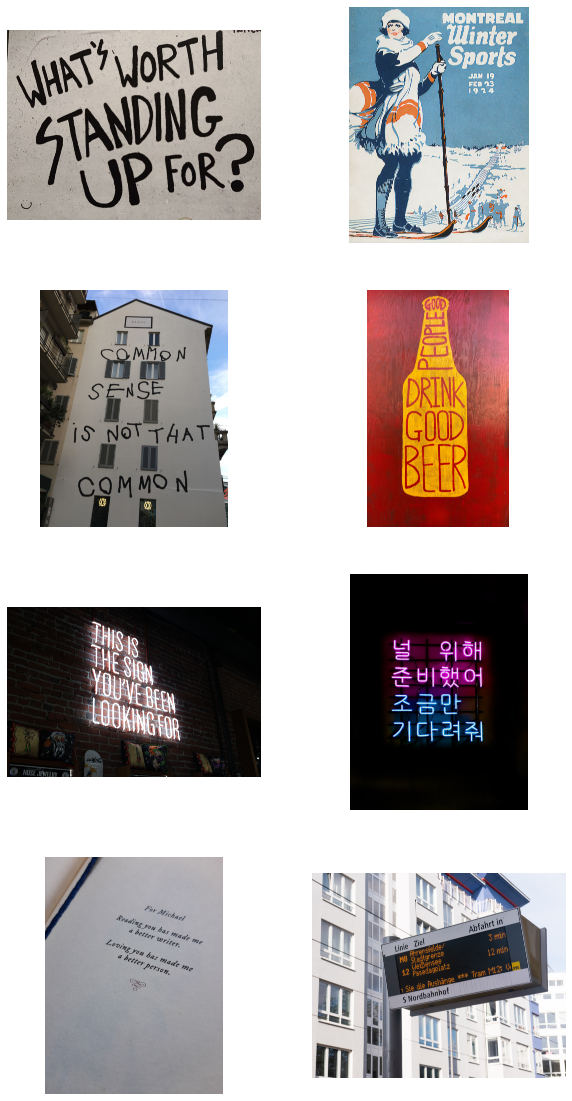

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for i, ax in enumerate(axes.flatten()):
#     print(images_list[i])
    image = img.imread(images_list[i])
    ax.imshow(image)
    ax.axis('off')

plt.show()

## Step 2. 다양한 OCR 모델 비교
## (1) Google OCR API

> - pip install --upgrade google-api-python-client
> - pip install google-cloud-vision

[구글의 파이썬 API 인터페이스 모듈](about:blank)을 설치하고, [Google Cloud Vision API](https://kimchangheon.tistory.com/166)를 사용하자.

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [19]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

-rw-r--r-- 1 root root 2321 Mar  3 06:31 /aiffel/aiffel/ocr_python/my_google_api_key.json


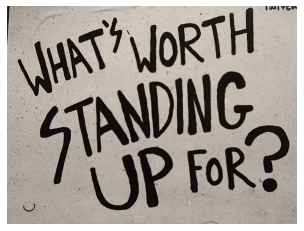

Texts:

"WHAT WORTH
STANDING
UP FOR?
"

"WHAT"

"WORTH"

"STANDING"

"UP"

"FOR?"
bounds: (2432,1862),(3838,1645),(3966,2474),(2560,2691)


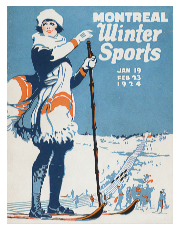

Texts:

"MONTREAL
Winter
Sports
JAN 19
FEB 23
1924
人く
"

"MONTREAL"

"Winter"

"Sports"

"JAN"

"19"

"FEB"

"23"

"1924"

"人"

"く"
bounds: (3508,3614),(3544,3606),(3558,3670),(3522,3678)


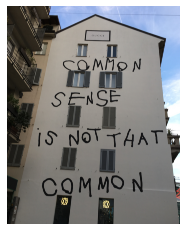

Texts:

"GUCCI
II
COMMON
SENSE
is NOT THAT
COMMON
"

"GUCCI"

"II"

"COMMON"

"SENSE"

"is"

"NOT"

"THAT"

"COMMON"
bounds: (608,2990),(2356,2896),(2376,3263),(628,3357)


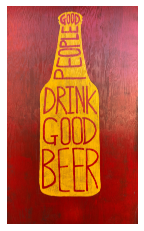

Texts:

"GOOD
DRINK
GOOD
BEER
"

"GOOD"

"DRINK"

"GOOD"

"BEER"
bounds: (494,2608),(1711,2608),(1711,3415),(494,3415)


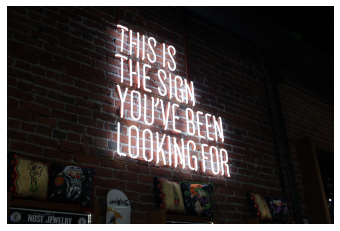

Texts:

"THIS IS
THE SIGN
YOU'VE BEEN
LOOKING FOR
NOSE JEWELRY
"

"THIS"

"IS"

"THE"

"SIGN"

"YOU'VE"

"BEEN"

"LOOKING"

"FOR"

"NOSE"

"JEWELRY"
bounds: (619,3311),(1029,3339),(1020,3471),(610,3443)


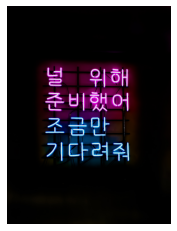

Texts:

"널 위해
준비했어
조금만
기다려줘
"

"널"

"위해"

"준비"

"했어"

"조금만"

"기다려"

"줘"
bounds: (1553,1904),(1703,1904),(1703,2207),(1553,2207)


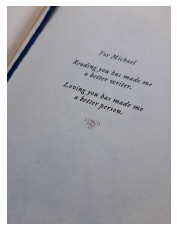

Texts:

"For Michael
Reading you has made me
a better writer.
Loving you has made me
a better person.
"

"For"

"Michael"

"Reading"

"you"

"has"

"made"

"me"

"a"

"better"

"writer."

"Loving"

"you"

"has"

"made"

"me"

"a"

"better"

"person."
bounds: (1742,1784),(2151,1932),(2106,2056),(1697,1908)


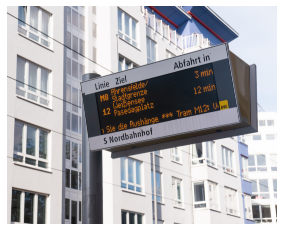

Texts:

"Abfahrt in
Linie Ziel
輔hrensfelde
Stadtgrenze
3 min
Weißensee
12
Pasedagplatz
12 min
1 Sie die Aushänge *** Tram MI2: V
S Nordbahnhof
BVG
"

"Abfahrt"

"in"

"Linie"

"Ziel"

"輔"

"hrensfelde"

"Stadtgrenze"

"3"

"min"

"Weißensee"

"12"

"Pasedagplatz"

"12"

"min"

"1"

"Sie"

"die"

"Aushänge"

"***"

"Tram"

"MI2:"

"V"

"S"

"Nordbahnhof"

"BVG"
bounds: (3484,1625),(3580,1608),(3590,1662),(3494,1679)


In [10]:
for name in images_list:
    image = img.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    detect_text(name)

## (2) keras-ocr

`keras-ocr`: 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해줌
> - 검출 모델: `CRAFT`(Character Region Awareness for Text Detection) 사용
> - 인식 모델: `CRNN` 사용

In [20]:
!pip list | grep keras-ocr

keras-ocr                     0.8.8


In [22]:
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [23]:
images = [keras_ocr.tools.read(name) for name in images_list]
prediction_groups = [pipeline.recognize([name]) for name in images_list]

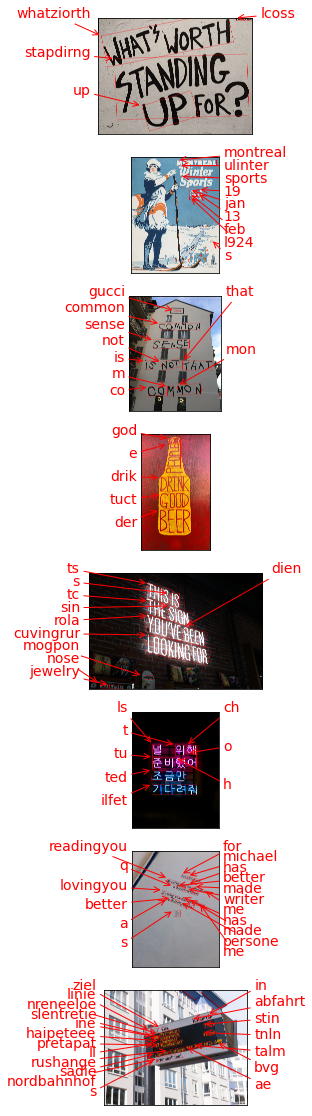

In [24]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## (3) tesseract

`tesseract(테서랙트)`: 구글에서 후원하는 OCR 오픈소스 라이브러리
- 이미지 내의 문자 검출과 인식을 한 번에 할 수 있음

In [ ]:
# $ sudo apt install tesseract-ocr
# $ sudo apt install libtesseract-dev

In [49]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
            
    return cropped_image_path_list

In [50]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

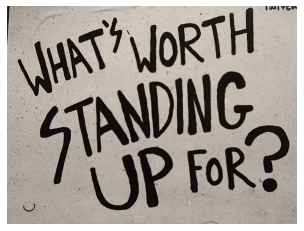


Done


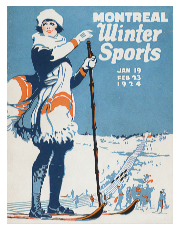

zz

©

A.

Done


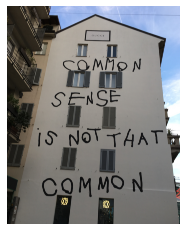

CC E_<_ Se is etliadisaetieltststeeesinemeenenssssetcsesessnesenemmmmssemeees

i

Done


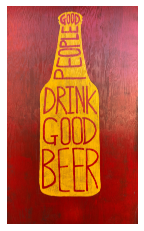



























































































|







































Done


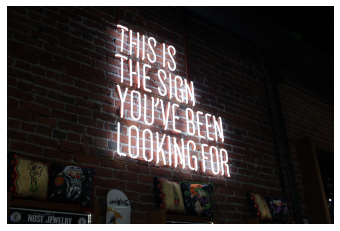


Done


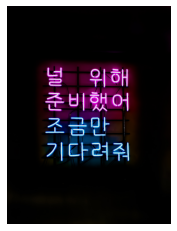

a

Done


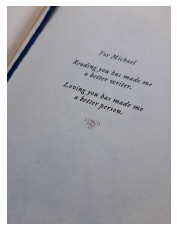

fy - =

Done


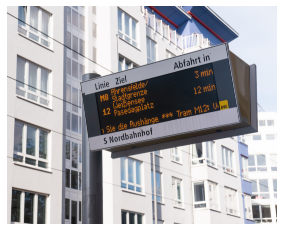


Done


In [76]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/out'

for name in images_list:
    image = img.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    cropped_image_path_list = crop_word_regions(name, work_dir)
    recognize_images(cropped_image_path_list)

## Step 3. 테스트 결과 정리
: 사진 각각의 시각화를 통해 3개의 모듈들의 성능을 한 눈에 비교해보자.

> - keras-ocr에서 image, predictions에 index 번호가 들어가야 해서 애초에 input을 index로 잡았다.
> - keras-ocr의 경우 마지막에 `plt.show()`를 하지 않으면 그림이 출력되지 않는다!


In [79]:
images_list

['/aiffel/aiffel/ocr_python/image/image1.jpg',
 '/aiffel/aiffel/ocr_python/image/image2.jpg',
 '/aiffel/aiffel/ocr_python/image/image3.jpg',
 '/aiffel/aiffel/ocr_python/image/image4.jpg',
 '/aiffel/aiffel/ocr_python/image/image5.jpg',
 '/aiffel/aiffel/ocr_python/image/image6.jpg',
 '/aiffel/aiffel/ocr_python/image/image7.jpg',
 '/aiffel/aiffel/ocr_python/image/image8.jpg']

In [113]:
def check_ocr_output(image_idx):
    print('Original image')
    image = img.imread(images_list[image_idx])
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    print('(1) Google OCR API')
    detect_text(images_list[image_idx])
    
    print('(2) Keras-OCR')
    keras_ocr.tools.drawAnnotations(image=images[image_idx], 
                                    predictions=prediction_groups[image_idx][0])    
    plt.show()
    
    print('(3) Tesseract')
    cropped_image_path_list = crop_word_regions(images_list[image_idx], work_dir)
    recognize_images(cropped_image_path_list)
#     plt.show()

Original image


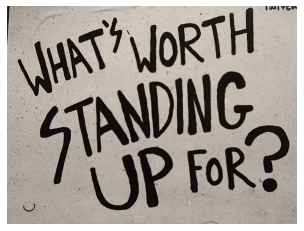

(1) Google OCR API
Texts:

"WHAT WORTH
STANDING
UP FOR?
"

"WHAT"

"WORTH"

"STANDING"

"UP"

"FOR?"
bounds: (2432,1862),(3838,1645),(3966,2474),(2560,2691)
(2) Keras-OCR


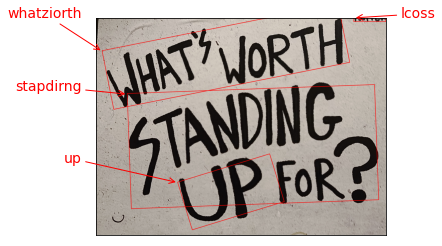

(3) Tesseract

Done


In [111]:
check_ocr_output(0)

> #### (1) GOOGLE OCR API
>> `What's` 부분에서 `'s` 부분은 제대로 출력하지 못했지만, 그 외에는 텍스트를 정확히 인지했다.
> #### (2) Keras-OCR
>> 텍스트가 있다는 것은 인식했지만, 어떤 글자인지 정확히 인식하지 못했다.
> #### (3) Tesseract
>> 아예 글자를 인식하지 못했다.

Original image


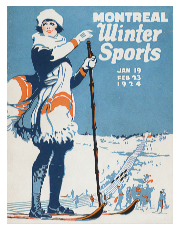

(1) Google OCR API
Texts:

"MONTREAL
Winter
Sports
JAN 19
FEB 23
1924
人く
"

"MONTREAL"

"Winter"

"Sports"

"JAN"

"19"

"FEB"

"23"

"1924"

"人"

"く"
bounds: (3508,3614),(3544,3606),(3558,3670),(3522,3678)
(2) Keras-OCR


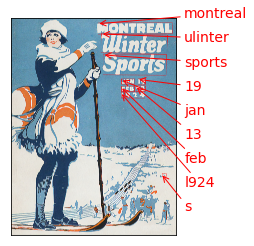

(3) Tesseract
zz

©

A.

Done


In [114]:
check_ocr_output(1)

> #### (1) GOOGLE OCR API
>> 글자를 모두 정확히 인식했다. 심지어는 텍스트가 아닌 그림 부분에서도 `人`와 `く`를 문자로 인식했다.
> #### (2) Keras-OCR
>> 글자를 대부분 잘 인식했지만 `W`를 `ul`로 인식하는 등 다소 올바르지 못한 부분이 존재한다. 마찬가지로 텍스트가 아닌 부분까지도 글자라고 인식했다. 
> #### (3) Tesseract
>> 좋지 않은 결과를 보인다.

Original image


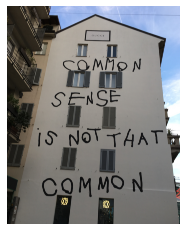

(1) Google OCR API
Texts:

"GUCCI
II
COMMON
SENSE
is NOT THAT
COMMON
"

"GUCCI"

"II"

"COMMON"

"SENSE"

"is"

"NOT"

"THAT"

"COMMON"
bounds: (608,2990),(2356,2896),(2376,3263),(628,3357)
(2) Keras-OCR


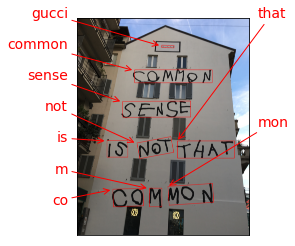

(3) Tesseract
CC E_<_ Se is etliadisaetieltststeeesinemeenenssssetcsesessnesenemmmmssemeees

i

Done


In [115]:
check_ocr_output(2)

> #### (1) GOOGLE OCR API
>> 화질이 좋지 않아 눈으로 보이지 않는 부분까지도 글자를 정확히 인식했다. 손글씨로 매우 삐뚤삐뚤하게 써있는 글씨도 올바른 단어로 정확히 보여주었고, `I` 모양과 같은 창문도 글자로 인식했다.
> #### (2) Keras-OCR
>> 손글씨로 적힌 글씨라 띄어쓰기도 일정하지 않은 탓에 한 글자를 여러 개의 글자로 나누어 인식했다.
> #### (3) Tesseract
>> 엉뚱한 글자로 인식했다.

Original image


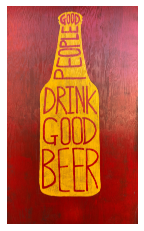

(1) Google OCR API
Texts:

"GOOD
DRINK
GOOD
BEER
"

"GOOD"

"DRINK"

"GOOD"

"BEER"
bounds: (494,2608),(1711,2608),(1711,3415),(494,3415)
(2) Keras-OCR


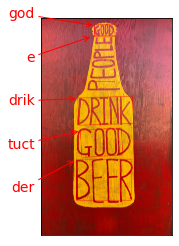

(3) Tesseract


























































































|







































Done


In [116]:
check_ocr_output(3)

> #### (1) GOOGLE OCR API
>> 대부분 잘 인식했지만, 세로로 작성된 `People`을 인식하지 못했다.
> #### (2) Keras-OCR
>> 글자를 인식했지만 성능이 좋지 않다.
> #### (3) Tesseract
>> 알 수 없는 띄어쓰기(빈칸)만이 인식되었다.

Original image


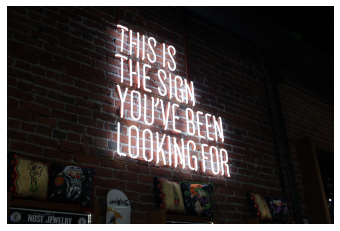

(1) Google OCR API
Texts:

"THIS IS
THE SIGN
YOU'VE BEEN
LOOKING FOR
NOSE JEWELRY
"

"THIS"

"IS"

"THE"

"SIGN"

"YOU'VE"

"BEEN"

"LOOKING"

"FOR"

"NOSE"

"JEWELRY"
bounds: (619,3311),(1029,3339),(1020,3471),(610,3443)
(2) Keras-OCR


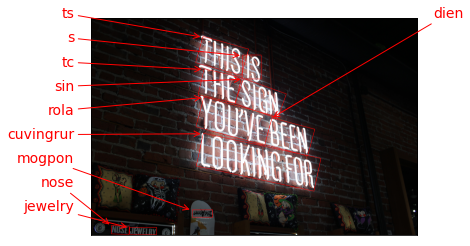

(3) Tesseract

Done


In [117]:
check_ocr_output(4)

> #### (1) GOOGLE OCR API
>> 매우 잘 인식했고, 어둡게 보이는 부분까지도 잘 인식했다.
> #### (2) Keras-OCR
>> 오히려 `Google OCR API`보다 많은 글자를 인식했지만 엉뚱한 단어로 인식했다.
> #### (3) Tesseract
>> 아예 글자를 인식하지 못했다.

Original image


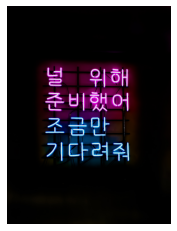

(1) Google OCR API
Texts:

"널 위해
준비했어
조금만
기다려줘
"

"널"

"위해"

"준비"

"했어"

"조금만"

"기다려"

"줘"
bounds: (1553,1904),(1703,1904),(1703,2207),(1553,2207)
(2) Keras-OCR


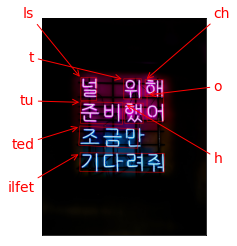

(3) Tesseract
a

Done


In [118]:
check_ocr_output(5)

> #### (1) GOOGLE OCR API
>> 한국어도 매우 잘 인식한다.
> #### (2) Keras-OCR
>> 한국어는 인식하지 못한다.
> #### (3) Tesseract
>> 아예 인식하지 못하였다.

Original image


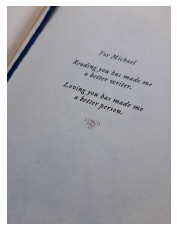

(1) Google OCR API
Texts:

"For Michael
Reading you has made me
a better writer.
Loving you has made me
a better person.
"

"For"

"Michael"

"Reading"

"you"

"has"

"made"

"me"

"a"

"better"

"writer."

"Loving"

"you"

"has"

"made"

"me"

"a"

"better"

"person."
bounds: (1742,1784),(2151,1932),(2106,2056),(1697,1908)
(2) Keras-OCR


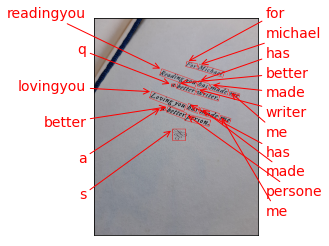

(3) Tesseract
fy - =

Done


In [119]:
check_ocr_output(6)

> #### (1) GOOGLE OCR API
>> 화질이 좋지 않아 흐릿하게 보이는 부분까지도 잘 인식했다.
> #### (2) Keras-OCR
>> 글자를 인식했지만 표기의 나열이 일정하지 않아 이해하기 어려웠다.
> #### (3) Tesseract
>> 엉뚱하게 인식했다.

Original image


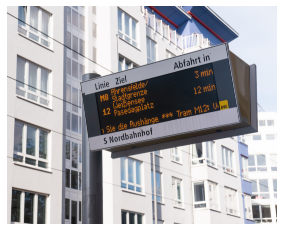

(1) Google OCR API
Texts:

"Abfahrt in
Linie Ziel
輔hrensfelde
Stadtgrenze
3 min
Weißensee
12
Pasedagplatz
12 min
1 Sie die Aushänge *** Tram MI2: V
S Nordbahnhof
BVG
"

"Abfahrt"

"in"

"Linie"

"Ziel"

"輔"

"hrensfelde"

"Stadtgrenze"

"3"

"min"

"Weißensee"

"12"

"Pasedagplatz"

"12"

"min"

"1"

"Sie"

"die"

"Aushänge"

"***"

"Tram"

"MI2:"

"V"

"S"

"Nordbahnhof"

"BVG"
bounds: (3484,1625),(3580,1608),(3590,1662),(3494,1679)
(2) Keras-OCR


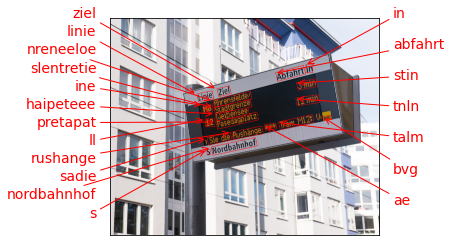

(3) Tesseract

Done


In [120]:
check_ocr_output(7)

> #### (1) GOOGLE OCR API
>> 특이하게 한자(`輔`)를 인식하기도 했다. `Abfahrt in`을 가장 먼저 출력하는 것으로 봐서 왼쪽보다는 상단에 위치하는 글자를 가장 먼저 인식하는 것 같다.
> #### (2) Keras-OCR
>> 글자를 인식했지만 표기의 나열이 일정하지 않아 이해하기 어려웠다.
> #### (3) Tesseract
>> 아예 인식하지 못했다.

### Step 4. 결과 분석과 결론 제시
내가 구현하고자 하는 서비스의 목적과 내용
> - 주어진 텍스트를 얼마나 정확하게 인식했는지
> - 흐리거나 작아 시각적으로 잘 구분되지 않는 텍스트도 얼마나 잘 인식하는지
> - 손글씨 데이터도 얼마나 잘 인식하는지

<br/>

1. **Google OCR API**
- 전체적으로 가장 오류가 적게 텍스트를 인식함
- 어두운 텍스트도 잘 인식함
- 특히나 다소 삐뚤빼뚤할 수 있는 손글씨조차 각 글자마다 띄어쓰기도 정확하게 구분함. (`3rd image`)
- 한 가지 아쉬웠던 점은 세로로 돌아간 단어를 잘 인식하지 못한 점 (`4th image` - People)
    - 회전된 글자는 잘 인식하지 못하는 것 같다.

<br/>

2. **Keras-OCR**
- 글자의 존재(위치)는 인식했지만 정확성이 매우 떨어짐
- 흐리거나 작은 글씨도 인식은 했지만 마찬가지로 글자 자체만 인식해 올바른 단어로 인식한 것은 아니었음
- 영어와 한글을 동시에 인식하지 못한다는 단점이 있음.

<br/>

3. **Tesseract**
- 이미지 인식 자체의 성능부터 매우 낮다.

<br/>

> 위 분석 결과에 따라 가장 나은 대안의 모델은 **`Google OCR API`** 이다.
> - 어떤 이미지나 사진이라도 가장 높은 정확성으로 문자를 인식할 수 있을 것이다.

***

# 🧤 회고

- 문자를 읽는 기술인 OCR에 대해 배워보았다.
- Google OCR API의 성능을 체감할 수 있었고, 반면 Tesseract 모듈의 아쉬움을 느낄 수 있었다.
- 내가 가져온 사진이 잘못되었나 or 함수 생성이 잘못되었나 싶을 정도로 Tesseract의 성능이 매우 좋지 않아 개인적으로도 아쉬웠다.
- 사실 이미지를 가져오는데에도 까다로웠다. 텍스트들이 중구난방 섞이며 복잡하게 나열된 이미지들에선 제대로 인식하지 못해 예제에선 제외하였다.
- 실제론 더 복잡한 이미지들이 많을텐데 그런 경우에서도 Google OCR API가 잘 동작하는지 더 다양한 예제로 확인해보고 싶다.
- 해당 기술이 실생활에서 매우 유의미하게 이용될 수 있을 것 같아 흥미로웠다. (ex. 사건, 사고가 담긴 cctv를 분석해야 할 때, 눈으론 인지하지 못하는 매우 작은 글자를 읽어내야 할 때 등)
- 한 이미지에 영어와 한국어가 동시에 들어가있을 때는 keras-ocr와 Tesseract 모두 이용하지 못할 것 같다.